

# Simple Linear Regression

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

-   Use scikit-learn to implement simple Linear Regression
-   Create a model, train,test and use the model


### Importing Needed packages


In [1]:
import numpy as np #scientific computing or also for creation of array why beacuause machi learning model only accepts data in term of array only
import pandas as pd #data manupulation
import matplotlib.pyplot as plt #Graph implementation

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [2]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head(10)



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


### Data Exploration

Lets first have a descriptive exploration on our data.


In [33]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Lets select some features to explore more.


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


We can plot each of these fearues:


Now, lets plot each of these features vs the Emission, to see how linear is their relation:


# dataframeName.columnName

In [35]:
cdf.ENGINESIZE

0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
1062    3.0
1063    3.2
1064    3.0
1065    3.2
1066    3.2
Name: ENGINESIZE, Length: 1067, dtype: float64

In [4]:
cdf.FUELCONSUMPTION_COMB

0        8.5
1        9.6
2        5.9
3       11.1
4       10.6
        ... 
1062    11.8
1063    11.5
1064    11.8
1065    11.3
1066    12.8
Name: FUELCONSUMPTION_COMB, Length: 1067, dtype: float64

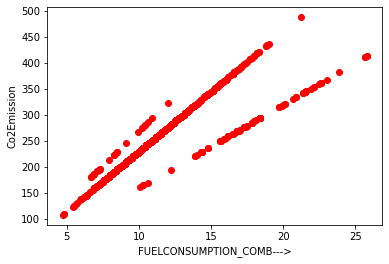

In [5]:
#plt.scatter(xaxisdata,yaxisdata,color = 'red')
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION_COMB--->")
plt.ylabel("Co2Emission")
plt.show()

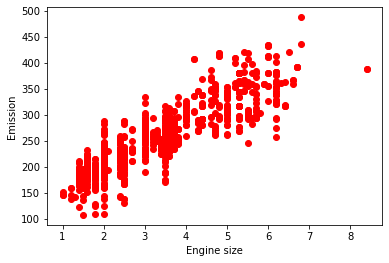

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice

Plot **CYLINDER** vs the Emission, to see how linear is their relation:


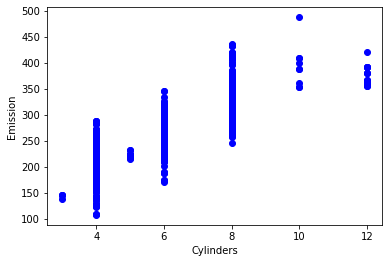

In [38]:
# write your code here

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()




<details><summary>Click here for the solution</summary>

```python
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

```

</details>


#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using **np.random.rand()** function: 


In [9]:
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [40]:
#800 ~ rows training
#200 ~ rows will be for testing

In [ ]:
#var[index]

In [11]:
msk = np.random.rand(len(cdf)) < 0.8 #80% #len 1067 #79.999999999999 = 80
train = cdf[msk] #80% of rows are your trainig example
test = cdf[~msk] #rest of the data out of the mask are for testing data #~not 

In [13]:
train.shape #(nrows,ncols)

(831, 4)

In [15]:
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
8,3.7,6,11.6,267
...,...,...,...,...
1061,3.2,6,11.2,258
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271


In [14]:
test.shape 

(236, 4)

In [16]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1,2.4,4,9.6,221
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
10,2.4,4,9.8,225
...,...,...,...,...
1047,3.6,6,10.8,248
1053,2.0,4,10.7,246
1055,3.0,6,10.4,281
1057,2.5,5,10.1,232


### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


#### Train data distribution


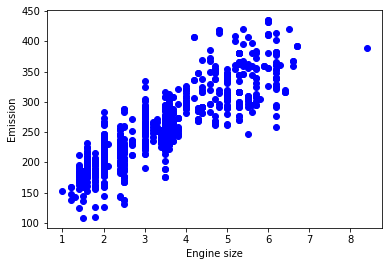

In [44]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling

Using sklearn package to model data.


In [45]:
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1058,3.0,6,11.5,264
1059,3.2,6,10.2,235
1061,3.2,6,11.2,258
1062,3.0,6,11.8,271


In [46]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
5,3.5,6,10.0,230
7,3.7,6,11.1,255
20,2.0,4,10.0,230
29,3.0,6,8.3,224
31,4.0,8,11.3,260
...,...,...,...,...
1049,2.0,4,6.8,184
1060,3.0,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [47]:
train[['ENGINESIZE']]

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
1058,3.0
1059,3.2
1061,3.2
1062,3.0


In [48]:
train[['CO2EMISSIONS']]

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1058,264
1059,235
1061,258
1062,271


In [49]:
np.asanyarray(train[['ENGINESIZE']])

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [2.4],
       [2.4],
       [3.5],
       [5.9],
       [5.9],
       [4.7],
       [4.7],
       [4.7],
       [4.7],
       [5.9],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [6.3],
       [3. ],
       [2. ],
       [2. ],
       [3. ],
       [2. ],
       [3. ],
       [3. ],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [5.2],
       [5.2],
       [4.2],
       [4. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [4. ],
       [3. ],
       [2. ],
       [2. ],
       [2. ],
       [4. ],
       [6. ],
       [4. ],
       [4. ],
       [6. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
      

In [17]:
np.asanyarray([train[['CO2EMISSIONS']]])

array([[[196],
        [136],
        [255],
        [244],
        [267],
        [212],
        [239],
        [338],
        [354],
        [338],
        [354],
        [359],
        [202],
        [230],
        [214],
        [230],
        [214],
        [235],
        [251],
        [258],
        [224],
        [258],
        [260],
        [227],
        [288],
        [361],
        [230],
        [242],
        [239],
        [258],
        [294],
        [336],
        [407],
        [354],
        [409],
        [407],
        [354],
        [409],
        [306],
        [308],
        [290],
        [285],
        [285],
        [267],
        [281],
        [281],
        [292],
        [209],
        [209],
        [237],
        [237],
        [356],
        [320],
        [380],
        [322],
        [437],
        [193],
        [200],
        [202],
        [181],
        [181],
        [193],
        [200],
        [209],
        [209],
        [209],
        [2

In [18]:
X = np.asanyarray(train[['ENGINESIZE']])

In [20]:
y = np.asanyarray(train[['CO2EMISSIONS']])

In [22]:
y

array([[196],
       [136],
       [255],
       [244],
       [267],
       [212],
       [239],
       [338],
       [354],
       [338],
       [354],
       [359],
       [202],
       [230],
       [214],
       [230],
       [214],
       [235],
       [251],
       [258],
       [224],
       [258],
       [260],
       [227],
       [288],
       [361],
       [230],
       [242],
       [239],
       [258],
       [294],
       [336],
       [407],
       [354],
       [409],
       [407],
       [354],
       [409],
       [306],
       [308],
       [290],
       [285],
       [285],
       [267],
       [281],
       [281],
       [292],
       [209],
       [209],
       [237],
       [237],
       [356],
       [320],
       [380],
       [322],
       [437],
       [193],
       [200],
       [202],
       [181],
       [181],
       [193],
       [200],
       [209],
       [209],
       [209],
       [221],
       [230],
       [228],
       [237],
       [232],
      

In [24]:
from sklearn import linear_model


#y = mx + c == y is dependent var, x is the data(indep. var) m is COEFFICIENT  and c is INTERCEPT

In [33]:
regr = linear_model.LinearRegression()


In [26]:
regr

LinearRegression()

In [27]:
train_x = np.asanyarray(train[['ENGINESIZE']]) #x represents independent variables 
train_y = np.asanyarray(train[['CO2EMISSIONS']]) #y represent dependent variable 

In [28]:
train_x #all values of engine size column

array([[2. ],
       [1.5],
       [3.5],
       [3.5],
       [3.7],
       [2.4],
       [3.5],
       [4.7],
       [4.7],
       [4.7],
       [4.7],
       [5.9],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [3. ],
       [4. ],
       [6.3],
       [3. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [4.2],
       [4.2],
       [5.2],
       [5.2],
       [4.2],
       [5.2],
       [5.2],
       [4.2],
       [4.2],
       [4. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [4. ],
       [3. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [6. ],
       [4. ],
       [6. ],
       [4. ],
       [6.8],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
      

In [29]:
train_y #column values of column co2emissions

array([[196],
       [136],
       [255],
       [244],
       [267],
       [212],
       [239],
       [338],
       [354],
       [338],
       [354],
       [359],
       [202],
       [230],
       [214],
       [230],
       [214],
       [235],
       [251],
       [258],
       [224],
       [258],
       [260],
       [227],
       [288],
       [361],
       [230],
       [242],
       [239],
       [258],
       [294],
       [336],
       [407],
       [354],
       [409],
       [407],
       [354],
       [409],
       [306],
       [308],
       [290],
       [285],
       [285],
       [267],
       [281],
       [281],
       [292],
       [209],
       [209],
       [237],
       [237],
       [356],
       [320],
       [380],
       [322],
       [437],
       [193],
       [200],
       [202],
       [181],
       [181],
       [193],
       [200],
       [209],
       [209],
       [209],
       [221],
       [230],
       [228],
       [237],
       [232],
      

In [79]:
#regr.fit(independentvariable,dependentvariable)
regr.fit(train_x, train_y)


LinearRegression()

In [36]:
coef_

NameError: name 'coef_' is not defined

In [80]:
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.74140208]]
Intercept:  [123.55054817]


In [81]:
regr.coef_

array([[39.74140208]])

In [82]:
regr.intercept_

array([123.55054817])

# regr.coef_[row][col]

In [83]:
regr.coef_[0][0]

39.741402077772186

In [84]:
regr.intercept_[0]

123.55054817197492

In [85]:
lst = [['a','b','c'],
      ['d','e','f']]

In [86]:
lst[1][2]

'f'

In [87]:
lst[1][1]

'e'

In [88]:
lst[1][1]

'e'

In [89]:
lst[1][2]

'f'

In [90]:
lst[0][2]

'c'

In [91]:
lst[0][0]

'a'

In [92]:
lst = [['hey']]

In [93]:
lst[0][0]

'hey'

As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs


We can plot the fit line over the data:


In [94]:
train_x

array([[2. ],
       [1.5],
       [3.5],
       [3.5],
       [3.7],
       [2.4],
       [3.5],
       [4.7],
       [4.7],
       [4.7],
       [4.7],
       [5.9],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [3. ],
       [4. ],
       [6.3],
       [3. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [4.2],
       [4.2],
       [5.2],
       [5.2],
       [4.2],
       [5.2],
       [5.2],
       [4.2],
       [4.2],
       [4. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [4. ],
       [3. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [6. ],
       [4. ],
       [6. ],
       [4. ],
       [6.8],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
      

Text(0, 0.5, 'Emission')

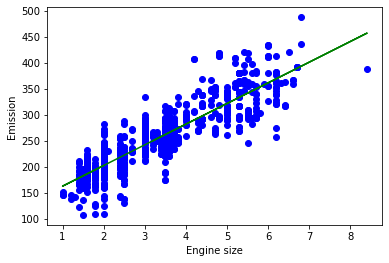

In [95]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'g') #y = mx+c
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 

```
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
```


In [96]:

test_x = np.asanyarray(test[['ENGINESIZE']]) #question in exam Questions
test_y = np.asanyarray(test[['CO2EMISSIONS']])#213,45,675,435,754 actual answers (ACTUAL answers)



In [97]:
test_x.shape #independent variable data for testing

(236, 1)

In [98]:
test_y.shape #dependent variable for testing

(236, 1)

In [99]:
predicted_y = regr.predict(test_x) #whatever answerr will be generated will be stored in predicted_y predicted


In [100]:
test_y.shape

(236, 1)

In [101]:
predicted_y.shape

(236, 1)

In [102]:
import sklearn

In [103]:
help(sklearn)

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experime

In [104]:
from sklearn.metrics import r2_score 

In [105]:
print(f"Mean absolute error: {np.mean(np.absolute(predicted_y - test_y))} ")#pred - actual
 

Mean absolute error: 22.617905303533465 


In [106]:
5 ** 2

25

In [107]:
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_y - test_y) **2))#1/nsigma(pred - act)^2 


Residual sum of squares (MSE): 855.28


In [108]:
from sklearn.metrics import r2_score 
print(f"R2-score:{r2_score(test_y , predicted_y)}") #most accurate thing or evaluation metrics

R2-score:0.7597005250441616


In [109]:
#7.6 --> engine
regr.predict([[7.6]])

array([[425.58520396]])

In [110]:
#1.6 --> engine
regr.predict([[1.6]])

array([[187.1367915]])